<img src="https://github.com/Center-for-Health-Data-Science/PythonTsunami/blob/spring2022/figures/HeaDS_logo_large_withTitle.png?raw=1" width="300">

<img src="https://github.com/Center-for-Health-Data-Science/PythonTsunami/blob/spring2022/figures/tsunami_logo.PNG?raw=1" width="600">

# Model fitting in scikit learn

In this section we'll look at how to define and fit a model in scikit learn.

In order to focus on the technical aspects we'll use a very simple toy dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#replace with link to github file when repo is public
link_to_file = "https://raw.githubusercontent.com/Center-for-Health-Data-Science/Python_part2/main/data/smoking.csv"

df = pd.read_csv(link_to_file)
df.head()

,daily_cigarettes,life
0,7,76
1,11,73
2,27,72
3,23,71
4,13,74


This is a toy dataset which contains the number of cigarettes smoked per day and how long the person lived. It is inspired by this paper if you want to take a look:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2598467/

We will use it to perform a linear regression.

<img src="https://github.com/Center-for-Health-Data-Science/Python_part2/blob/main/teachers/figures/2018-11-image25-1024x548.jpg?raw=1" width="700">


## Preparing the data

## Exercise 1 (15 mins)

Before modelling we should have a look at the data.

* Are there any missing values?
* Make a plot that shows you the distribution of each of the variables. Does it look reasonable? Is the range fine, or are there values we do not think are accurate, like the 0 BMI values in the diabetes data?
* Make a scatter plot of the two variables against each other.

## Train Test Split

Now that we have confirmed that our data is clean, we need to perform the split into a training set we use for fitting and a test set which we reserve to evaluate the model performance.

In [ ]:
#import the function to produce the training and test sets
from sklearn.model_selection import train_test_split

The [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) tells us that the usage of `train_test_split` is:

```python
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
```

We can set the random_state if we are interested in being able to reproduce the **same** train-test split. Otherwise rows will be randomly assigned.


So we have to

* define what is the outcome variable (y) of our dataset
* define what is the predictor variable/variables (x) of our dataset
* split them up
* and we'll also make them into `numpy` arrays because we're using scikit learn

In [ ]:
#if there are several predictors we could also drop the outcome columns instead
#and save it in a different object
X = df['daily_cigarettes'].to_numpy()

In [ ]:
y = df['life'].to_numpy()

In [ ]:
#Let's use 1/4 of the data as test set
#We will also put in a random state so that we get the same division every time we run this code.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

Checking the shape shows us that indeed, 75% of our data is in the training set and 25% in the test set.

In [ ]:
X_train.shape

(75,)

In [ ]:
X_test.shape

(25,)

## Defining the model

The linear model we will make is an object of the class `LinearRegression`. We initialize it like so:

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

It is the same syntax we used yesterday to initalize the PCA object:

```python
from sklearn.decomposition import PCA
#Init a PCA object
PCA_obj = PCA(n_components = 4)
```

## Fitting the model

Now we use the `fit()` method of the `LinearRegression` class to fit our model. Since it is a method we execute it **on** our model object, `lin_model`.

In [ ]:
lin_model.fit(X_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 9  4  1 12  8 31  3  2 16 29 11 12  7  0 16 23  3 14 25 22  9 32  8 24
 23  9 25  0  6 19 30 27 15 31  0 11 11 16 34 30 13 27  5  9 18 21 32  4
  5 17 28 31  3 33 11 21 33 30  7 11 26 12 26 33 34 20 32 19 30 32 17  8
 11 23 11].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

What did we do wrong? The error message is quite explicit that it expects a 2D array and even how to make it.

We have 1 feature and many measurements, so we need `reshape(-1,1)`.

In [ ]:
X_train = X_train.reshape(-1,1)
X_train.shape

(75, 1)

In [ ]:
lin_model.fit(X_train,y_train)

LinearRegression()

Now that we have a fitted model we can have a look at its attributes.

In [ ]:
vars(lin_model)

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([-0.2648716]),
 'rank_': 1,
 'singular_': array([88.77131669]),
 'intercept_': 78.39095741980896}

You will note that some attribute names end in an underscore. In scikit-learn that means that these attributes take on a meaningful value after the `fit` method was executed.

In other words, attributes with names that end in an underscore are the **trainable** parameters of the model.

Attributes without an underscore are **hyperparameters** that the user chooses when they define the model.

Note that this meaning **does not** transfer to python in general. It is a convention of the scikit-learn package.



So what does this mean? Just like functions, the method that creates a class instance can have default parameters. When we call the class creator without any parameters we accept the default:

```python
lin_model = LinearRegression()
```

We could instead have chosen not to fit an intercept:

```python
lin_model = LinearRegression(fit_intercept = False)
```

How do you know what the default parameters are? It is in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

<img src="https://github.com/Center-for-Health-Data-Science/Python_part2/blob/main/teachers/figures/lin_reg_docu.PNG?raw=1" width="700">


In general, scikit-learn is written with the intent of sensible default values.

Then what about the trainable parameters, the attributes ending in an underscore? They have been determined from the data, `X_train`, `y_train` when we executed the `fit` method.

We had one predictor, i.e. feature which is the number of cigarettes smoked per day:

In [ ]:
lin_model.n_features_in_

1

This is the intercept $b_0$ the model has estimated:

In [ ]:
lin_model.intercept_

78.39095741980896

So at 0 cigarettes per day the model predicts a life expectancy of 78.4 years.

And here is the slope, i.e. coefficient, $b_1$:

In [ ]:
lin_model.coef_

array([-0.2648716])

For each extra cigarette per day, the model estimates that life expectancy goes down by 0.26 years.

Looking back at our scatter plot that seems to fit with the provided data (remember this is toy data!).

<Axes: xlabel='daily_cigarettes', ylabel='life'>

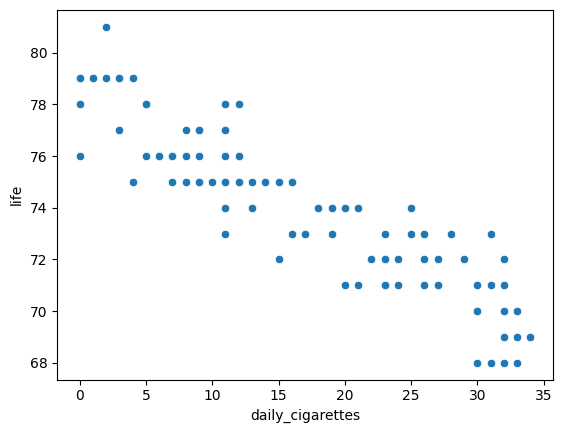

In [ ]:
sns.scatterplot(data=df, x='daily_cigarettes', y='life')

## Exercise 2 (5 mins)

In your group summarize our workflow so far. What are the steps we have done since loading in the data? What are the data structures we use at each step?

## Evaluating the model

Remember the data we left out of the model training?

We will now take the `X_test` and use the model to predict `y_pred`, the predicted outcome:

$$ \hat{y}= b_0 + b_1 * X $$

Then we'll compare the predictions we obtain for $ŷ$ with the actual observed outcome saved in `y_test`.

Just like `fit()` there is also a `predict()` method we'll run to get the predictions. Since we execute `predict` on our trained model it will use the intercept and coefficient we have identified during fitting.

In [ ]:
y_pred = lin_model.predict(X_test.reshape(-1,1))
y_pred

array([72.29891071, 75.47736986, 72.03403911, 77.59634263, 69.65019475,
       76.53685625, 75.47736986, 77.06659944, 69.65019475, 74.94762667,
       74.15301188, 69.91506634, 70.44480953, 77.86121423, 76.00711305,
       75.47736986, 77.59634263, 73.88814028, 73.88814028, 74.68275507,
       69.91506634, 69.38532315, 76.53685625, 73.0935255 , 72.8286539 ])

So these are our predictions. Let's add them to the plot.

We'll need to cast them into a pandas dataframe so we use seaborn. It will have two columns, `y_pred` the predicted life expectancy, and `X_test` the number of cigarettes per day on our held out test data.

We can make a dataframe with this syntax:

```python
new_df = pd.DataFrame(my_array)
```

But that means we need both `X_test` and `y_pred` in the same 2D numpy array.

## Exercise 3 (10 mins)

Combine `X_test` and `y_pred` into a 2D numpy array that you name `predictions`. The dimension of the resulting array should be (25,2), so 25 rows and 2 columns and `X_test` should be the first column.

Have a look at [Joining arrays](https://colab.research.google.com/drive/1hfp2LU-TngXBsZYPUpzH0xei-XQ16o9J#scrollTo=ZAcOyDIn6a-5) in the numpy notebook if you need a refresher.

Now we can make a dataframe:

In [ ]:
predictions = pd.DataFrame(predictions, columns = ['cigs', 'life'])
predictions.head()

,cigs,life
0,23.0,72.298911
1,11.0,75.477370
2,24.0,72.034039
3,3.0,77.596343
4,33.0,69.650195


And add the new data points to the scatter plot.

Unsurprisingly, they paint a line. This is the regression line we have estimated.

<Axes: xlabel='daily_cigarettes', ylabel='life'>

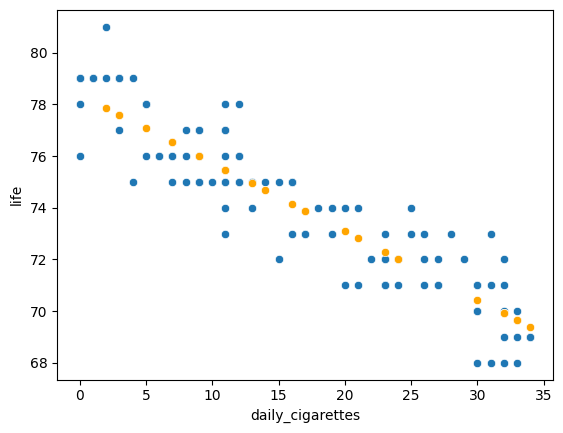

In [ ]:
#original data
sns.scatterplot(data=df, x='daily_cigarettes', y='life')
#predictions from our model
sns.scatterplot(data=predictions, x='cigs', y='life', color = 'orange')

<Axes: xlabel='daily_cigarettes', ylabel='life'>

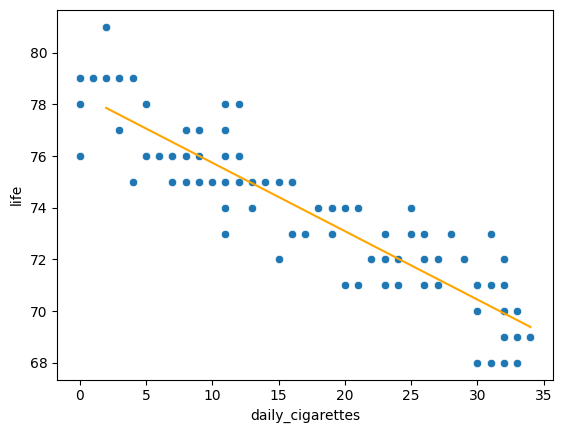

In [ ]:
#original data
sns.scatterplot(data=df, x='daily_cigarettes', y='life')
sns.lineplot(data=predictions, x='cigs', y='life', color = 'orange')

## Estimating the error

We can now quantify the error, i.e. how much our predicted values for y differ from the observed values.

We'll use the mean squared error for that. It is the mean over all squared distances between prediction (in orange) and true value (in blue).

<img src="https://github.com/Center-for-Health-Data-Science/Python_part2/blob/main/teachers/figures/mse_3.jpg?raw=1" width="400">


In [ ]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test, y_pred)
mse

1.3368726533498565

This means that on average, our predicted life expectancy is 1.34 years off from the measured value.

## Group Exercise part 1(30 mins)

Now you!
Work together in groups for the next 30 minutes to solve the following questions.

1. Load in the Boston Housing data and subset it to only the `medv` and `rm` columns. A quick reminder, `medv` is median value per house in 1000s and `rm` is the average number of rooms in the house. You can also rename the columns if you would like.

2. Make a scatter plot of the number of rooms VS the house price. What is your expectation for the model performance based on the plot?

3. Convert your data to numpy arrays, one for the predictor and one for the outcome. Split them into test and training set. During splitting, set the `random_state` to 123 so you can later achieve the same test and training sets again. Verify the shape of all your arrays.  

4. Now, define and fit a linear regression model to predict the outcome, `medv` (the house price), based on the number of rooms (`rm`).  Remember to fit the model only on the training data.

5. Have a look at the parameters of the fitted model. What do they mean? Also compare them to the inital scatter plot you made. You can remake it so you don't have to scroll too far.

6. Use the held out test data to predict house prices with your trained model. Plot them together with the original data, in one scatter plot like we did above.

7. Calculate the mean squared error of your model.



## Group Exercise Part 2 (10 mins)

8. Now, go back to the numpy array you made for the room values in point 3. Scale and center this array, like we did for PCA. Have a look at section [Scaling and Centering the Data](https://colab.research.google.com/drive/10bJ0uobV7pRRD_8UmMuc0EHsmLcFtlhs#scrollTo=wbmUfXP2_vey) if you need a refresh. You will need to convert the array into 2D with `.reshape(-1,1)` in order to be allowed to use scale.

9. Redo the split into train and test data with the scaled predictor array you just made. Remember to use `random_state=123` so you get the same samples into the training and test set as you did before.

10. Define and fit another linear regression model with this data.  

11. Compare your results to the previous model. What are the intercept and slope? What is their meaning in this model?